In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing



data=pd.read_csv("https://raw.githubusercontent.com/OxCGRT/USA-covid-policy/master/data/OxCGRT_US_latest.csv")


In [2]:
data_new=data[["RegionName", "Jurisdiction", "Date", 'StringencyIndexForDisplay', 'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndexForDisplay', 'EconomicSupportIndexForDisplay']]

In [3]:
data=data_new[data.Jurisdiction=="STATE_ALL"]

In [4]:
data_new.drop('Jurisdiction', axis=1, inplace=True)

In [5]:
data=data_new

In [6]:
data_may=data[data.Date.astype(str).str.contains("202005")]
# print(data_april.head)

In [7]:
columns_to_normalize=["StringencyIndexForDisplay", "GovernmentResponseIndexForDisplay", "ContainmentHealthIndexForDisplay", "EconomicSupportIndexForDisplay"]
def normalize_columns():
    for i in columns_to_normalize:
        max=data_may[i].max()
        min=data_may[i].min()
        new_str=i+"_norm"
        data_may[new_str]=(data_may[i]-min)/(max-min)

In [8]:
normalize_columns()
# print(data_may.head)

<ipython-input-7-ae55c7302608>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_may[new_str]=(data_may[i]-min)/(max-min)


In [9]:
data_may.dropna(axis=0, how="any", inplace=True)

<ipython-input-9-a85bbe986cb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_may.dropna(axis=0, how="any", inplace=True)


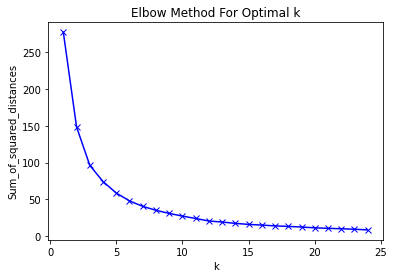

In [10]:
# find OPTIMAL value for kmeans
from sklearn.cluster import KMeans
may_kmeans = pd.DataFrame(data_may, columns=['StringencyIndexForDisplay_norm', 'GovernmentResponseIndexForDisplay_norm', 'ContainmentHealthIndexForDisplay_norm', 'EconomicSupportIndexForDisplay_norm'])
Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(may_kmeans[['StringencyIndexForDisplay_norm', 'GovernmentResponseIndexForDisplay_norm', 'ContainmentHealthIndexForDisplay_norm', 'EconomicSupportIndexForDisplay_norm']])
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()



In [11]:
# run KMeans
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(may_kmeans[['StringencyIndexForDisplay_norm', 'GovernmentResponseIndexForDisplay_norm', 'ContainmentHealthIndexForDisplay_norm', 'EconomicSupportIndexForDisplay_norm']])
may_kmeans['Cluster'] = y
may_kmeans["State"]=data_may["RegionName"]
print(may_kmeans.head())

     StringencyIndexForDisplay_norm  GovernmentResponseIndexForDisplay_norm  \
375                        0.712383                                0.791188   
376                        0.712383                                0.791188   
377                        0.712383                                0.791188   
378                        0.712383                                0.791188   
379                        0.712383                                0.791188   

     ContainmentHealthIndexForDisplay_norm  \
375                               0.727242   
376                               0.727242   
377                               0.727242   
378                               0.727242   
379                               0.727242   

     EconomicSupportIndexForDisplay_norm  Cluster   State  
375                                 0.75        2  Alaska  
376                                 0.75        2  Alaska  
377                                 0.75        2  Alaska  
378     

In [12]:
# may make dictionaries of each state in each cluster and how many datapoints from that state are in that cluster

may_cluster1={}
may_cluster2={}
may_cluster3={}
may_cluster4={}
may_cluster5={}
may_cluster6={}
may_cluster7={}
may_cluster0={}
list_of_clusters_dicts=[may_cluster0,may_cluster1,may_cluster2,may_cluster3,may_cluster4,may_cluster5,may_cluster6,may_cluster7]

for index, row in may_kmeans.iterrows():
    for i in range(0,8):
        if row["Cluster"]==i:
            if row["State"] in list_of_clusters_dicts[i]:
                list_of_clusters_dicts[i][row["State"]]+=1
            else:
                list_of_clusters_dicts[i][row["State"]]=1

list_of_clusters_dicts=[may_cluster0,may_cluster1,may_cluster2,may_cluster3,may_cluster4,may_cluster5,may_cluster6,may_cluster7]

states_and_their_clusters={}
for index, row in may_kmeans.iterrows():
    if row["State"] in states_and_their_clusters:
        pass
    else:
        state_dict={}
        for i in range(len(list_of_clusters_dicts)):
            if row["State"] in list_of_clusters_dicts[i]:
                state_dict[i+1]=list_of_clusters_dicts[i][row["State"]]
        state_dict_vals=list(state_dict.values())
        state_dict_keys=list(state_dict.keys())
        state_vals_max=max(state_dict_vals)
        max_ind=state_dict_vals.index(state_vals_max)
        max_cluster= state_dict_keys[max_ind]
        states_and_their_clusters[row["State"]]= max_cluster
# print(states_and_their_clusters)

clusters_and_their_states={1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[]}

for i in states_and_their_clusters.keys():
    for j in range(1,9):
        if states_and_their_clusters[i]==j:
            clusters_and_their_states[j].append(i)


print(clusters_and_their_states)
                
    

{1: ['Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Georgia', 'Iowa', 'Indiana', 'Kansas', 'Louisiana', 'Massachusetts', 'Mississippi', 'Nebraska', 'New Jersey', 'Nevada', 'Oregon', 'Pennsylvania', 'South Carolina', 'Virginia', 'Wisconsin', 'West Virginia'], 2: ['North Dakota', 'Oklahoma', 'South Dakota', 'Utah', 'Virgin Islands'], 3: ['Connecticut', 'Washington DC', 'Delaware', 'Illinois', 'Kentucky', 'Maryland', 'Maine', 'Montana', 'New Hampshire', 'New Mexico', 'New York', 'Rhode Island', 'Vermont'], 4: ['Alabama', 'Arkansas', 'Hawaii', 'Idaho', 'Michigan', 'Minnesota', 'Missouri', 'North Carolina', 'Ohio', 'Tennessee', 'Texas', 'Washington', 'Wyoming'], 5: [], 6: [], 7: [], 8: []}


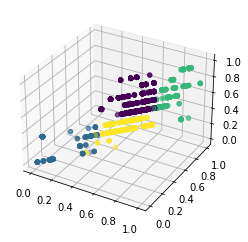

In [13]:
# 4d plot for may kmeans
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = may_kmeans["GovernmentResponseIndexForDisplay_norm"]
y = may_kmeans["ContainmentHealthIndexForDisplay_norm"]
z = may_kmeans["EconomicSupportIndexForDisplay_norm"]
# c = may_kmeans["StringencyIndexForDisplay_norm"]
s= may_kmeans["StringencyIndexForDisplay_norm"]
# img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
# img = ax.scatter(x, y, z)

categories = np.unique(may_kmeans["Cluster"])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  
may_kmeans["Color"] = may_kmeans["Cluster"].apply(lambda x: colordict[x])

img=ax.scatter(x,y,z, c=may_kmeans.Color)


# fig.colorbar(img)
plt.show()


In [14]:
# 5d plot for may kmeans

import plotly
import plotly.graph_objs as go

#Set marker properties
markersize = may_kmeans['StringencyIndexForDisplay_norm'] *30
markercolor = may_kmeans['Cluster']

#Make Plotly figure
fig1 = go.Scatter3d(x=may_kmeans["GovernmentResponseIndexForDisplay_norm"],
                    y=may_kmeans["ContainmentHealthIndexForDisplay_norm"],
                    z=may_kmeans["EconomicSupportIndexForDisplay_norm"],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Gov't Response Index"),
                                yaxis=dict( title="Containment Health Index"),
                                zaxis=dict(title="Economic SUpport INdex")),
                    )

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True, filename=("may K means.html")
                   )


'may K means.html'